# Project Name: Medical Appointment No Shows


# importing

In [1]:
pip install -q seaborn=0.13.2

ERROR: Invalid requirement: 'seaborn=0.13.2'
Hint: = is not a valid operator. Did you mean == ?



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('darkgrid')
sns.set_palette('pastel')

# exploring

In [4]:
data = pd.read_csv("/kaggle/input/noshowappointments/KaggleV2-May-2016.csv")
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
print(data.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')


1. **PatientId**: Unique identifier for each patient.
2. **AppointmentID**: Unique identifier for each appointment.
3. **Gender**: Gender of the patient (M for male, F for female).
4. **ScheduledDay**: The date and time when the appointment was scheduled.
5. **AppointmentDay**: The date of the actual appointment.
6. **Age**: Age of the patient.
7. **Neighbourhood**: The neighborhood where the appointment is scheduled.
8. **Scholarship**: Indicates whether the patient is enrolled in the Bolsa Família welfare program (0 for not enrolled, 1 for enrolled).
9. **Hipertension**: Indicates whether the patient has hypertension (0 for no, 1 for yes).
10. **Diabetes**: Indicates whether the patient has diabetes (0 for no, 1 for yes).
11. **Alcoholism**: Indicates whether the patient has alcoholism (0 for no, 1 for yes).
12. **Handicap**: Indicates the level of handicap of the patient (0 for no handicap, 1-4 for varying degrees of handicap).
13. **SMS_received**: Indicates whether the patient received an SMS reminder for the appointment (0 for no, 1 for yes).
14. **No-show**: Indicates whether the patient did not show up for the appointment (No for showed up, Yes for did not show up).


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
data = data.drop(["PatientId", "AppointmentID"], axis=1)

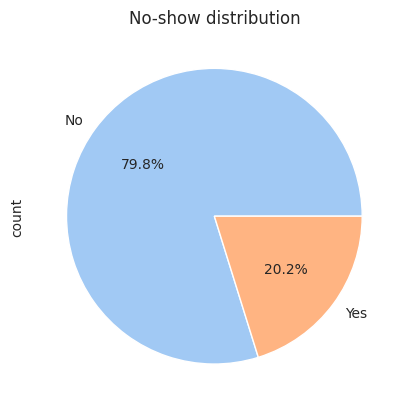

In [9]:
data["No-show"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("No-show distribution");

In [10]:
data["No-show"] = data["No-show"].map({"No":0, "Yes":1})

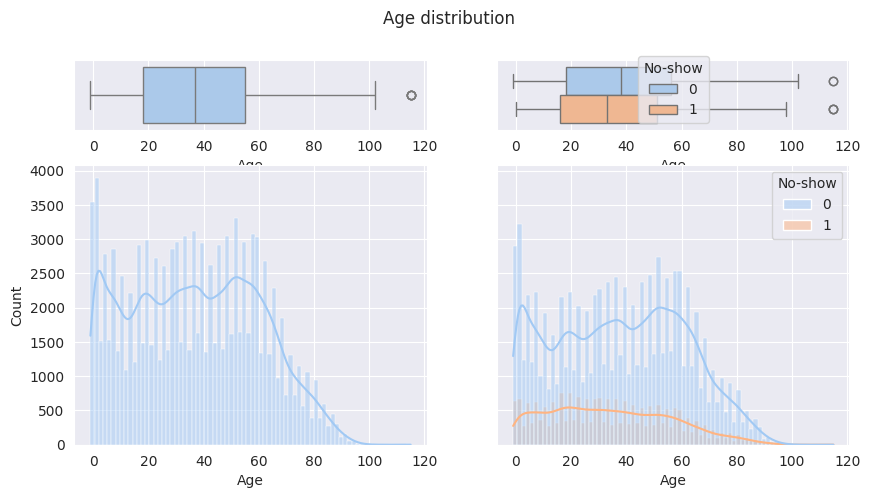

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5), height_ratios=[.2, .8], sharey='row')
sns.boxplot(data=data, x="Age", ax=axes[0, 0])
sns.boxplot(data=data, x="Age", hue="No-show", ax=axes[0, 1])
sns.histplot(data=data, x="Age", kde=True, ax=axes[1, 0])
sns.histplot(data=data, x="Age", hue="No-show", kde=True, ax=axes[1, 1])
fig.suptitle("Age distribution");

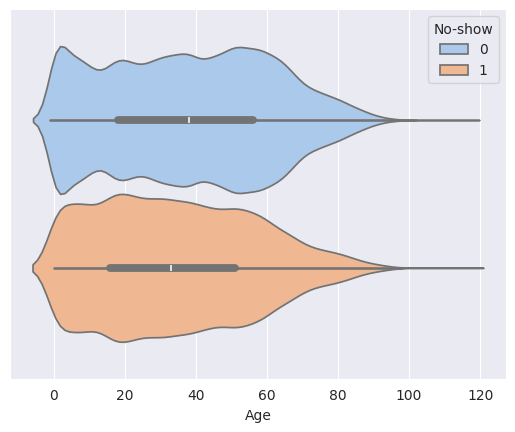

In [12]:
sns.violinplot(data=data, x="Age", hue="No-show");

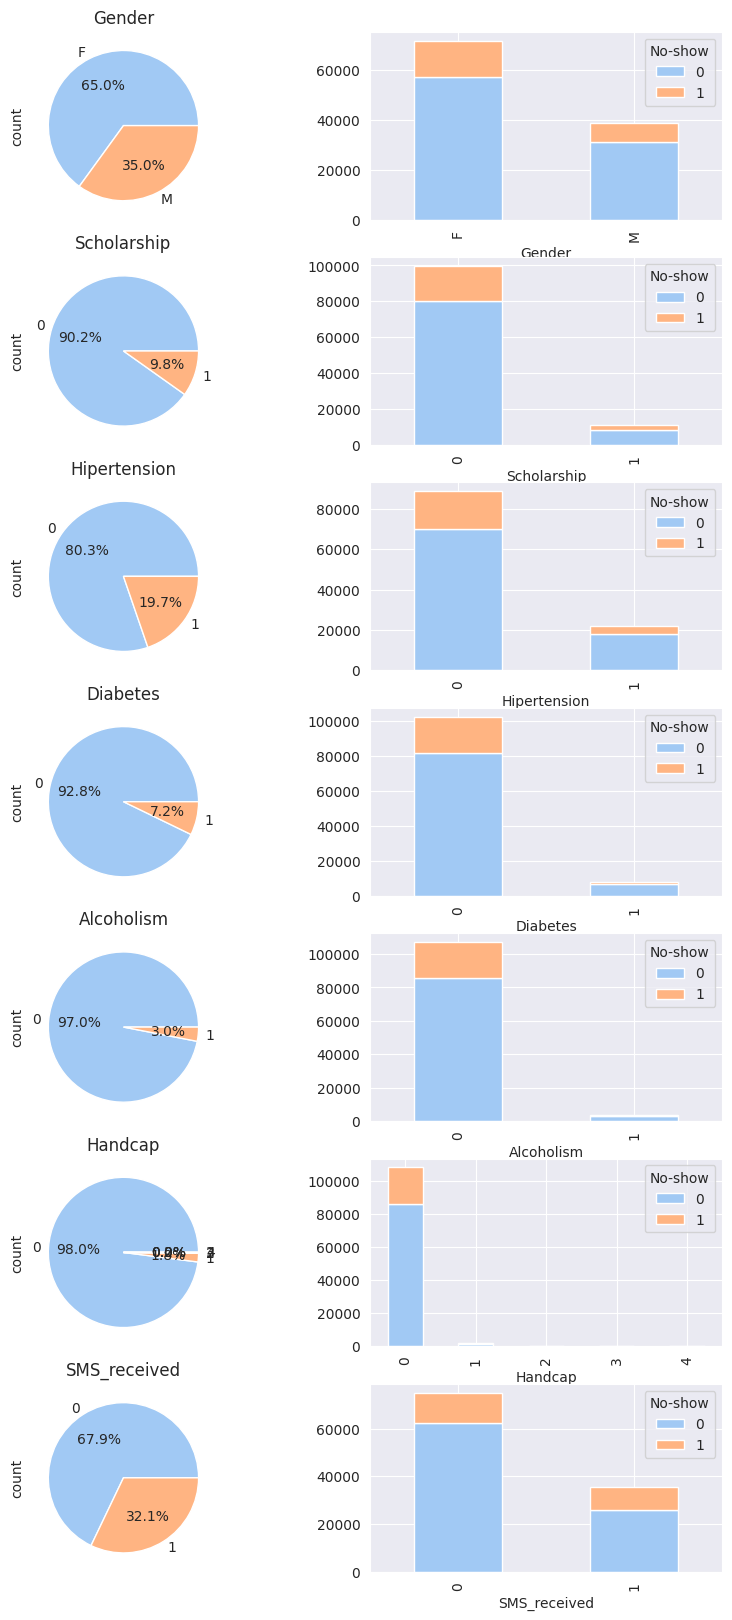

In [13]:
cols = ["Gender", "Scholarship", "Hipertension", "Diabetes", "Alcoholism", "Handcap", "SMS_received"]
fig, axes = plt.subplots(7, 2, figsize=(10, 20))
i = 0
for col in cols:
    (ax1, ax2) = axes[i%7]
    # plot pie chart of each feature
    data[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax = ax1)
    ax1.set_title(col)
    # create contingency table of each feature with target (No-show)
    ct = pd.crosstab(data[col], data['No-show'])
    # stacked bar plot
    ct.plot(kind='bar', stacked=True, ax=ax2)
    i += 1

In [14]:
data["Gender"] = data["Gender"].map({"F":0, "M":1})

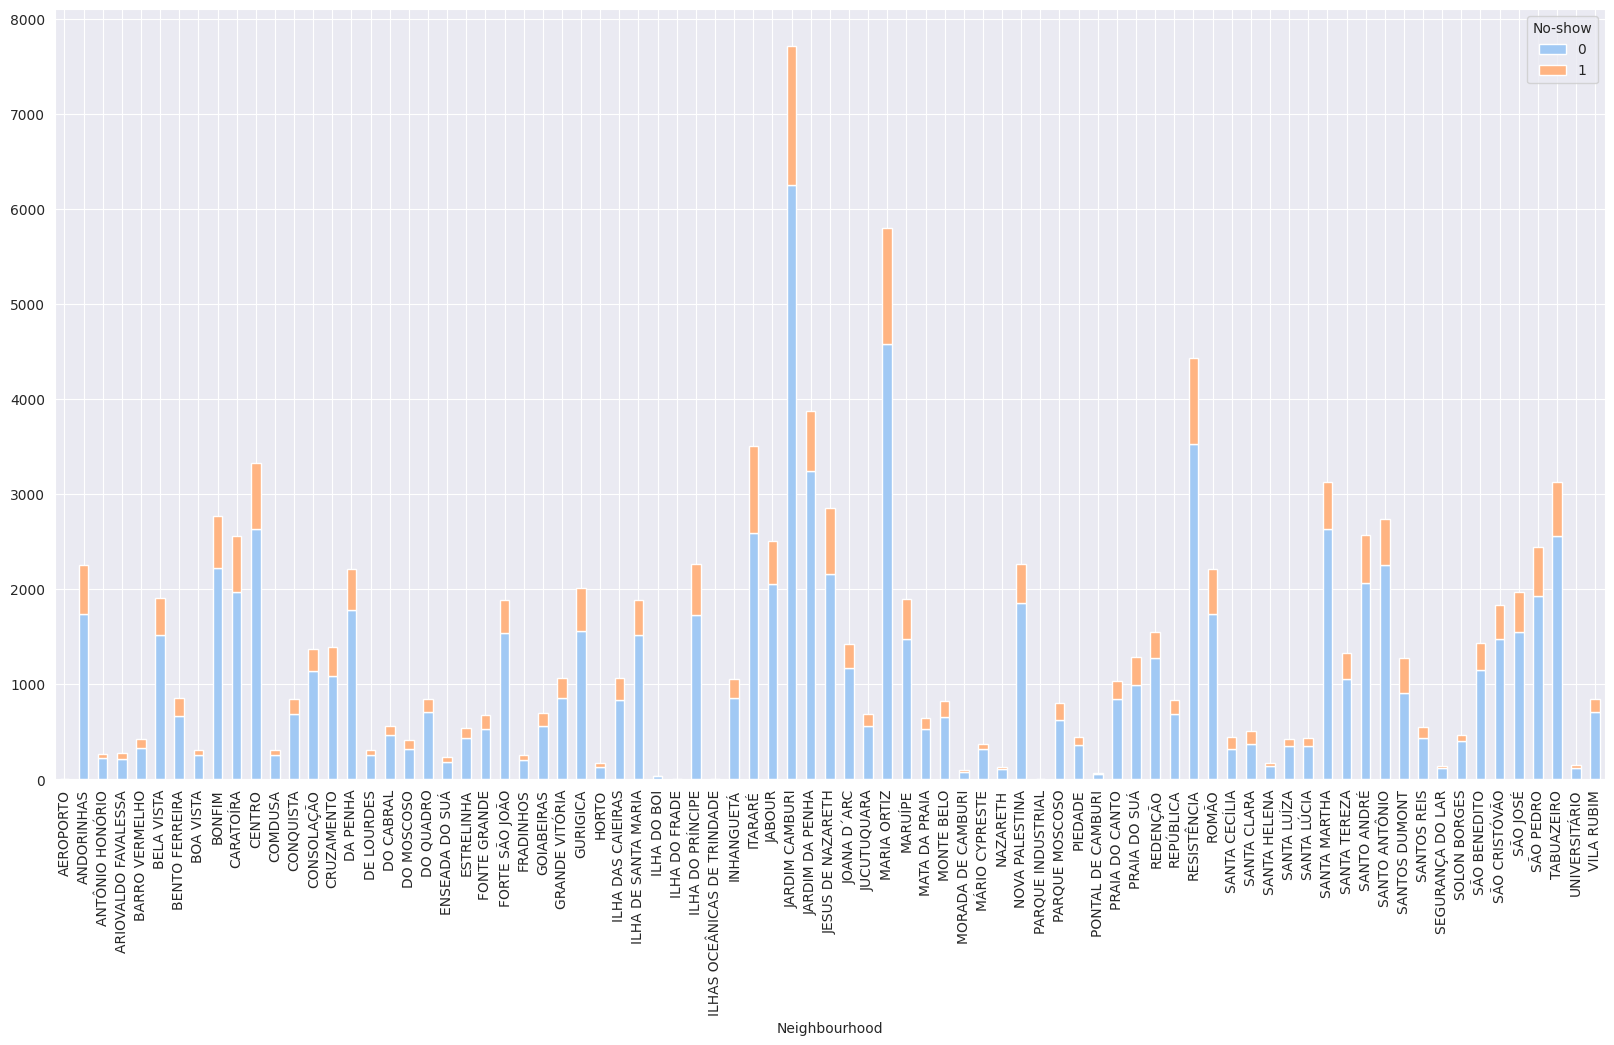

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
# contingency table of neighbourhood with No-show
ct = pd.crosstab(data["Neighbourhood"], data["No-show"])
# stacked bar plot of contingecy table
ct.plot(kind='bar', stacked=True, ax=ax)
plt.xticks(rotation=90);

In [16]:
data["ScheduledDay"] = pd.to_datetime(data["ScheduledDay"])

In [17]:
data["AppointmentDay"] = pd.to_datetime(data["AppointmentDay"])

In [18]:
data["WaitingTime"] = (data["AppointmentDay"] - data["ScheduledDay"]).dt.days
data["WaitingTime"]

0         -1
1         -1
2         -1
3         -1
4         -1
          ..
110522    34
110523    34
110524    40
110525    40
110526    40
Name: WaitingTime, Length: 110527, dtype: int64

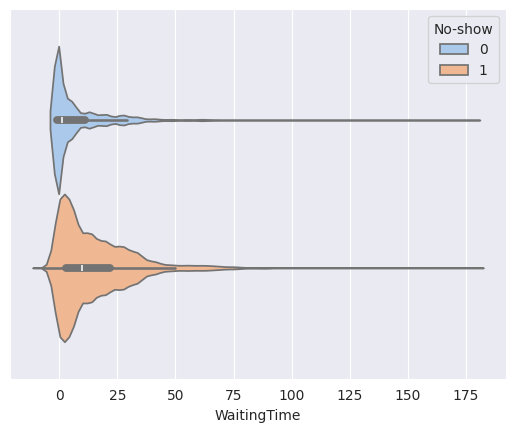

In [19]:
sns.violinplot(data= data, x="WaitingTime", hue="No-show");

In [20]:
data = data.drop(["ScheduledDay", "AppointmentDay"], axis=1)

# preprocessing

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110527 non-null  int64 
 1   Age            110527 non-null  int64 
 2   Neighbourhood  110527 non-null  object
 3   Scholarship    110527 non-null  int64 
 4   Hipertension   110527 non-null  int64 
 5   Diabetes       110527 non-null  int64 
 6   Alcoholism     110527 non-null  int64 
 7   Handcap        110527 non-null  int64 
 8   SMS_received   110527 non-null  int64 
 9   No-show        110527 non-null  int64 
 10  WaitingTime    110527 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 9.3+ MB


In [22]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(data, train_size=0.8, stratify=data["No-show"], random_state=42)
train_df, dev_df = train_test_split(train_df, train_size=0.8, stratify=train_df["No-show"], random_state=42)

In [23]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import QuantileTransformer, PowerTransformer
label = LabelEncoder()
standard = StandardScaler()
robust = RobustScaler()
minmax = MinMaxScaler()
quantile = QuantileTransformer(output_distribution='normal')

In [24]:
encoding_map = {value: i for i, (value, count) in enumerate(train_df["Neighbourhood"].value_counts(ascending=True).items())}
train_df["Neighbourhood"] = train_df["Neighbourhood"].map(encoding_map)
dev_df["Neighbourhood"] = dev_df["Neighbourhood"].map(encoding_map)
test_df["Neighbourhood"] = test_df["Neighbourhood"].map(encoding_map)

In [25]:
train_df["QuantiledAge"] = quantile.fit_transform(train_df[["Age"]])
dev_df["QuantiledAge"] = quantile.transform(dev_df[["Age"]])
test_df["QuantiledAge"] = quantile.transform(test_df[["Age"]])

In [26]:
train_df["Age"] = robust.fit_transform(train_df[["Age"]])
dev_df["Age"] = robust.transform(dev_df[["Age"]])
test_df["Age"] = robust.transform(test_df[["Age"]])

In [27]:
train_df["QuantiledWaitingTime"] = quantile.fit_transform(train_df[["WaitingTime"]])
dev_df["QuantiledWaitingTime"] = quantile.transform(dev_df[["WaitingTime"]])
test_df["QuantiledWaitingTime"] = quantile.transform(test_df[["WaitingTime"]])

In [28]:
train_df["WaitingTime"] = np.log1p(robust.fit_transform(train_df[["WaitingTime"]]))
dev_df["WaitingTime"] = np.log1p(robust.transform(dev_df[["WaitingTime"]]))
test_df["WaitingTime"] = np.log1p(robust.transform(test_df[["WaitingTime"]]))

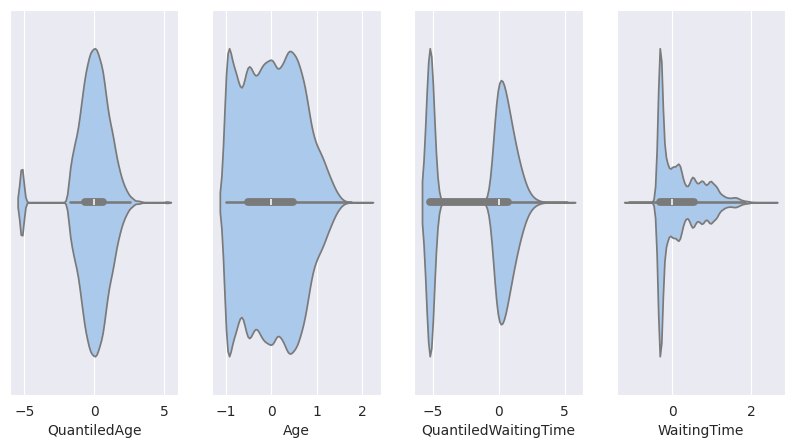

In [29]:
fig, axes = plt.subplots(1, 4, figsize=(10, 5))
cols = ["QuantiledAge", "Age", "QuantiledWaitingTime", "WaitingTime"]
for col, ax in zip(cols, axes):
    sns.violinplot(data=train_df, x=col, ax=ax);

In [30]:
train_df.shape, dev_df.shape, test_df.shape

((70736, 13), (17685, 13), (22106, 13))

In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70736 entries, 17594 to 1543
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                70736 non-null  int64  
 1   Age                   70736 non-null  float64
 2   Neighbourhood         70736 non-null  int64  
 3   Scholarship           70736 non-null  int64  
 4   Hipertension          70736 non-null  int64  
 5   Diabetes              70736 non-null  int64  
 6   Alcoholism            70736 non-null  int64  
 7   Handcap               70736 non-null  int64  
 8   SMS_received          70736 non-null  int64  
 9   No-show               70736 non-null  int64  
 10  WaitingTime           70736 non-null  float64
 11  QuantiledAge          70736 non-null  float64
 12  QuantiledWaitingTime  70736 non-null  float64
dtypes: float64(4), int64(9)
memory usage: 7.6 MB


In [32]:
X_train, y_train = train_df.drop(["No-show"], axis=1), train_df["No-show"]
X_test, y_test = test_df.drop(["No-show"], axis=1), test_df["No-show"]

# modeling

In [33]:
pip install -q imblearn


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [34]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score, classification_report

In [35]:
# Define the pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  # SMOTE for oversampling
    ('rf_classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'rf_classifier__n_estimators': [50, 100, 200],  
    'rf_classifier__max_depth': [None, 10, 20],  
    'rf_classifier__max_features': ["sqrt", "log2", 0.5, 1.0],
    'rf_classifier__min_samples_split': [2, 5, 10],  
    'rf_classifier__min_samples_leaf': [1, 2, 4],  
    'rf_classifier__bootstrap': [True, False]
}

scoring = make_scorer(f1_score, pos_label=1)
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid,
                                   scoring=scoring,
                                   n_iter=25, cv=3, verbose=1, random_state=42, 
                                   n_jobs=-1)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                             ('rf_classifier',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'rf_classifier__bootstrap': [True,
                                                                     False],
                                        'rf_classifier__max_depth': [None, 10,
                                                                     20],
                                        'rf_classifier__max_features': ['sqrt',
                                                                        'log2',
                                                                        0.5,
                                                                        1.0],
                                        'rf_classifier__min_samples_leaf': [1,
                                                                            2,
                                                                            4],
                                        'rf_classifier__min_samples_split': [2,
                                                                             5,
                                                                             10],
                                        'rf_classifier__n_estimators': [50, 100,
                                                                        200]},
                   random_state=42,
                   scoring=make_scorer(f1_score, response_method='predict', pos_label=1),
                   verbose=1)

In [36]:
best_params = random_search.best_params_
print(best_params)

{'rf_classifier__n_estimators': 200, 'rf_classifier__min_samples_split': 5, 'rf_classifier__min_samples_leaf': 4, 'rf_classifier__max_features': 'sqrt', 'rf_classifier__max_depth': 10, 'rf_classifier__bootstrap': True}


In [37]:
best_estimator = random_search.best_estimator_
preds = best_estimator.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.90      0.60      0.72     17642
           1       0.32      0.73      0.44      4464

    accuracy                           0.63     22106
   macro avg       0.61      0.67      0.58     22106
weighted avg       0.78      0.63      0.67     22106



# MLP : pytorch

In [38]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [39]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE

'cpu'

In [40]:
class CustomDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe
        
    def __getitem__(self, idx):
        sample = self.dataframe.iloc[idx][:]
        X = sample.drop(["No-show"]).values.astype(float)
        y = sample["No-show"]
        features = torch.tensor(X, dtype=torch.float32)
        target = torch.tensor(y, dtype=torch.float32).unsqueeze(0)
        return features, target
        
    def __len__(self):
        return len(self.dataframe)

In [41]:
class Classifier(nn.Module):
    def __init__(self, hidd1=64, hidd2=64, hidd3=32, hidd4=16):
        super().__init__()
        self.linear1 = nn.Linear(12, hidd1)
        self.linear2 = nn.Linear(hidd1, hidd2)
        self.linear3 = nn.Linear(hidd2, hidd3)
        self.linear4 = nn.Linear(hidd3, hidd4)
        self.linear5 = nn.Linear(hidd4, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.relu(self.linear3(x))
        x = self.relu(self.linear4(x))
        x = self.linear5(x)
        return x

In [42]:
def train(model, criterion, optimizer, dataloader):
    model.train()
    total_loss = 0
    for X, y in dataloader:
        X, y = X.to(DEVICE), y.to(DEVICE)
        pred = model(X)
        loss = criterion(pred, y)
        total_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return total_loss/len(dataloader)

In [43]:
def evaluate(model, criterion, dataloader):
    model.eval()
    total_loss = 0.0
    correct = 0
    true_positives = 0
    total_predicted_positives = 0
    total_actual_positives = 0
    
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(DEVICE), y.to(DEVICE)  
            pred = model(X)
            loss = criterion(pred, y)
            total_loss += loss.item()
            pred_classes = (torch.sigmoid(pred) > 0.5).float()
            correct += (pred_classes == y).sum().item()
            true_positives += ((pred_classes == 1) & (y == 1)).sum().item()
            total_predicted_positives += pred_classes.sum().item()
            total_actual_positives += y.sum().item()

    accuracy = correct / len(dataloader.dataset)
    precision = true_positives / total_predicted_positives if total_predicted_positives > 0 else 0
    recall = true_positives / total_actual_positives if total_actual_positives > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return {
        "loss": total_loss / len(dataloader),
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score
    }

In [44]:
from tqdm import tqdm

NUM_EPOCHS = 10
def train_evaluate_over_epochs(model, loss_fn, optimizer, train_data_loader, validation_data_loader):
    metrics_history = {
        "training_losses": [],
        "dev_losses": [],
        "accuracies": [],
        "precisions": [],
        "recalls": [],
        "f1_scores": [],
    }
    
    best_score = float('-inf')
    best_result = {
        "metrics": None,
        "model": None
    }
    
    for epoch in range(NUM_EPOCHS):
        training_loss = train(model, loss_fn, optimizer, train_data_loader)
        evaluation_metrics = evaluate(model, loss_fn, validation_data_loader)
        
        metrics_history["training_losses"].append(training_loss)
        metrics_history["dev_losses"].append(evaluation_metrics["loss"])
        metrics_history["accuracies"].append(evaluation_metrics["accuracy"])
        metrics_history["precisions"].append(evaluation_metrics["precision"])
        metrics_history["recalls"].append(evaluation_metrics["recall"])
        metrics_history["f1_scores"].append(evaluation_metrics["f1_score"])
        
        if evaluation_metrics["f1_score"] > best_score:
            best_result["metrics"] = evaluation_metrics
            best_result["model"] = model
            best_score = evaluation_metrics["f1_score"]
    
    return metrics_history, best_result

In [45]:
def plot_losses(metrics):
    x_axis = range(1, NUM_EPOCHS + 1)
    fig, axd = plt.subplot_mosaic("AA;BC", figsize=(12, 8))
    ax1, ax2, ax3 = axd["A"], axd["B"], axd["C"]
    
    ax1.plot(x_axis, metrics["training_losses"], label="Train Loss")
    ax1.plot(x_axis, metrics["dev_losses"], label="Dev Loss")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Loss")
    ax1.legend()
    
    ax2.plot(x_axis, metrics["accuracies"], label="Dev Accuracy")
    ax2.set_xlabel("Epochs")
    ax2.legend()

    ax3.plot(x_axis, metrics["f1_scores"], label="Dev f1 Score")
    ax3.set_xlabel("Epochs")
    ax3.legend()
    
    plt.grid(True)
    plt.tight_layout()
    fig.suptitle("Performance Of The Best Model")
    plt.show()

In [46]:
def wrapper(params, train_dataloader, dev_dataloader):
    classifier = Classifier(*params).to(DEVICE)
    criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor(4.0))
    optimizer = torch.optim.Adam(classifier.parameters())
    return train_evaluate_over_epochs(classifier, criterion, optimizer, train_dataloader, dev_dataloader)

In [47]:
torch.manual_seed(42)

train_dataset = CustomDataset(train_df)
dev_dataset = CustomDataset(dev_df)
test_dataset = CustomDataset(test_df)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)
dev_dataloader = DataLoader(dev_dataset, batch_size=16, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

In [48]:
from itertools import product
from joblib import Parallel, delayed

param_grid = {
    'hidd1': [32, 64, 128],
    'hidd2': [32, 64, 128],
    'hidd3': [16, 32, 64],
    'hidd4': [8, 16, 32]
}

all_params = list(product(*param_grid.values()))

with Parallel(n_jobs=-1) as parallel:
    results = parallel(delayed(wrapper)(params, train_dataloader, dev_dataloader) for params in all_params)

In [49]:
best_metrics_history, best_best_result = None, None
best_score = float('-inf')
for metrics_history, best_result in results:
    if best_result["metrics"]["f1_score"] > best_score:
        best_metrics_history = metrics_history
        best_best_result = best_result
        best_score = best_result["metrics"]["f1_score"]

In [50]:
best_best_result["metrics"]

{'loss': 0.961853577932225,
 'accuracy': 0.6123833757421544,
 'precision': 0.31204212454212454,
 'recall': 0.7633716045925512,
 'f1_score': 0.44299991874542943}

In [51]:
print(best_best_result["model"])

Classifier(
  (linear1): Linear(in_features=12, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=32, bias=True)
  (linear4): Linear(in_features=32, out_features=8, bias=True)
  (linear5): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)


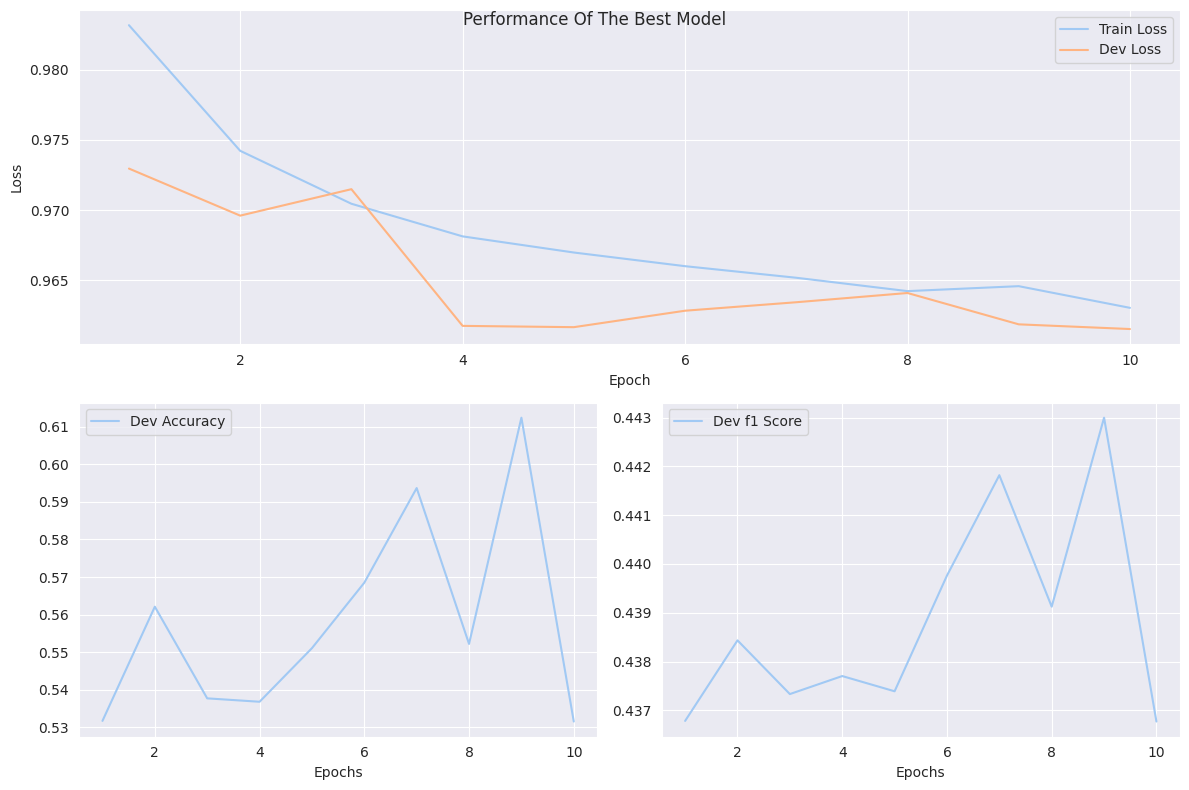

In [52]:
plot_losses(best_metrics_history)

# final result

In [53]:
from sklearn.metrics import classification_report
best_classifier = best_best_result["model"]
with torch.no_grad():
    X_test, y_test = next(iter(test_dataloader))
    X_test = X_test.to(DEVICE)
    pred_logits = best_classifier(X_test)
    pred_binary = (torch.sigmoid(pred_logits) > 0.5).float()
print(classification_report(y_test, pred_binary.cpu().numpy()))

              precision    recall  f1-score   support

         0.0       0.95      0.43      0.59     17642
         1.0       0.29      0.91      0.44      4464

    accuracy                           0.53     22106
   macro avg       0.62      0.67      0.51     22106
weighted avg       0.82      0.53      0.56     22106

